1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In the binary representation, typically 1 bit ($j$) is dedicated to specifying the sign of the number, and the **conversion between binary and decimal representation** is:

$$d = (-1)^j\sum_{i=0}^{N-1} \alpha_i ~ 2^i$$

where $\alpha_i$ are either 0 or 1. 
$b=\alpha_{N-1}\alpha_{N-2}..\alpha_0$ is the binary representation of the number.


One of the methods to convert **decimal to binary** is by dividing the given decimal number recursively by 2. Then, the remainders are noted down till we get 0 as the final quotient. After this step, these remainders are written in reverse order to get the binary value of the given decimal number.

In [12]:
#FIRST ROUGH VERSION

#print(type(bin(-2))) #I can see that usually the binary code is put into a string

def convert_bd(binary): 
    if type(binary) == int : 
        binary = str(binary)
    if type(binary) == str : 
        binary = list(binary)
    if type(binary) == list: 
        for item in range(len(binary)): 
            binary[item] = int(binary[item])
    decimal = 0
    for i in range(1,len(binary)): 
        decimal = decimal + binary[-i]*2**(i-1)
    decimal = decimal*(-1)**(binary[0])
    return decimal

print("decimal of 11:",convert_bd(11))

def convert_db(decimal):  
    remainder = []
    if decimal > 0: 
        flag = False
    elif decimal < 0: 
        flag = True
    while decimal != 0: 
        rem = decimal%2
        decimal = decimal//2
        remainder.append(rem)
    if flag == False : 
        remainder.append(0)
    if flag == True : 
        remainder.append(1)
    remainder.reverse()
    binary = ''.join(map(str, remainder))  # Convert list of integers to a binary string
    return binary

print("binary of 3:", convert_db(3))
print("actual binary of 3:", bin(3))

def convert_dh(decimal): 
    remainder = []
    if decimal > 0: 
        flag = False
    elif decimal < 0: 
        flag = True
    while decimal != 0: 
        rem = decimal%16
        decimal = decimal//16
        if rem == 10: 
            rem = 'A'
        if rem == 11: 
            rem = 'B'
        if rem == 12: 
            rem = 'C'
        if rem == 13: 
            rem = 'D'
        if rem == 14: 
            rem = 'E'
        if rem == 15: 
            rem = 'F'
        remainder.append(rem)
    if flag == False : 
        remainder.append(0)
    if flag == True : 
        remainder.append(1)
    remainder.reverse()
    hexadecimal = ''.join(map(str, remainder))  # Convert list of integers to a binary string
    return hexadecimal

print("hexadecimal of 25:", convert_dh(25))
print("actual hexadecimal of 25:", hex(25))
    
def convert_hd(hexadecimal): 
    if type(hexadecimal) == int : 
        hexadecimal = str(hexadecimal)
    if type(hexadecimal) == str : 
        hexadecimal = list(hexadecimal)
    if type(hexadecimal) == list: 
        for item in range(len(hexadecimal)): 
            if item == 'A': 
                hexadecimal[item] = 10
            if item == 'B': 
                hexadecimal[item] = 11
            if item == 'C': 
                hexadecimal[item] = 12
            if item == 'D': 
                hexadecimal[item] = 13
            if item == 'E': 
                hexadecimal[item] = 14
            if item == 'F': 
                hexadecimal[item] = 15
            hexadecimal[item] = int(hexadecimal[item])
    decimal = 0  
    for i in range(1,len(hexadecimal)): 
        decimal = decimal + hexadecimal[-i]*16**(i-1)
    if hexadecimal[0] == 0: 
        return decimal
    elif hexadecimal[0] == 1: 
        return -1*decimal

print("decimal of 0x19:", convert_hd('119'))


decimal of 11: -1
binary of 3: 011
actual binary of 3: 0b11
hexadecimal of 25: 019
actual hexadecimal of 25: 0x19
decimal of 0x19: -25


In [13]:
#IMPROVED VERSION

def convert_number(value, from_base, to_base):
    # Helper function to convert from any base to decimal
    def to_decimal(value, base):
        if isinstance(value, str):
            value = list(value.upper()) # convert all lowercase letters to uppercase
        # Map hexadecimal characters to their decimal equivalents
        hex_map = {'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15}
        decimal_value = 0
        is_negative = False

        # Handle negative sign for binary and decimal inputs
        if (base ==2 and value[0] == 1) or (base ==10 and value[0] == '-') :
            is_negative = True
            value = value[1,:]
  
        # Convert each character to its integer equivalent
        for i, char in enumerate(reversed(value)):
            if isinstance(char, str) and char in hex_map:
                digit = hex_map[char]
            else:
                digit = int(char)
            decimal_value += digit * (base ** i)

        return -decimal_value if is_negative else decimal_value

    # Helper function to convert from decimal to any base
    def from_decimal(decimal, base):
        hex_chars = "0123456789ABCDEF"
        is_negative = decimal < 0
        decimal = abs(decimal)
        result = []

        # Perform conversion
        while decimal > 0:
            remainder = decimal % base
            result.append(hex_chars[remainder])
            decimal //= base

        if is_negative:
            result.append('-')
        return ''.join(reversed(result)) or '0'

    # Convert from 'from_base' to decimal, then to 'to_base'
    if from_base == to_base:
        return str(value)  # No conversion needed if bases are the same

    decimal_value = to_decimal(value, from_base)

    if to_base == 10:
        return str(decimal_value)  # Return as decimal string

    return from_decimal(decimal_value, to_base)


# Examples
print("Binary 11 to Decimal:", convert_number('11', 2, 10))       # Expected: 3
print("Decimal 3 to Binary:", convert_number('3', 10, 2))         # Expected: 11
print("Decimal 25 to Hexadecimal:", convert_number('25', 10, 16)) # Expected: 19
print("Hexadecimal 19 to Decimal:", convert_number('19', 16, 10)) # Expected: 25

#Notice that in the previus example input values must be strings. I could modifiy that just converting integer to string at the beginning of the function. 

Binary 11 to Decimal: 3
Decimal 3 to Binary: 11
Decimal 25 to Hexadecimal: 19
Hexadecimal 19 to Decimal: 25


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [22]:
def sp_float(word):
    # Ensure input is a 32-character binary string
    if isinstance(word, str) and len(word) == 32:
        # Interpret the bits as per IEEE 754 single precision format
        sign_bit = int(word[0])             # First bit is the sign bit
        exponent_bits = int(word[1:9], 2)       # Next 8 bits are the exponent
        mantissa_bits = word[9:]                # Remaining 23 bits are the mantissa

        # Convert sign, exponent, and mantissa to decimal
        sign = (-1) ** sign_bit
        exponent = exponent_bits - 127         # IEEE 754 single precision bias for exponent is 127
        # Convert mantissa bits to fractional part (1.m format)
        mantissa = 1 + sum(int(bit) * 2**-(i+1) for i, bit in enumerate(mantissa_bits))

        # Calculate the final floating-point value
        number = sign * mantissa * (2 ** exponent)
        return number
    else:
        print("This is not a valid 32-bit binary word for this exercise")
        return None

# Helper function to convert float to 32-bit binary string for testing
import struct

def float_to_binary32(value):
    [packed_value] = struct.unpack('>I', struct.pack('>f', value))
    binary_string = f'{packed_value:032b}'
    return binary_string

# Example usage
number = 3.14
binary_representation = float_to_binary32(number)
print(f"The binary representation of {number} is: {binary_representation}")

# Convert the binary representation back to a float
reconstructed_number = sp_float(binary_representation)
print(f"Reconstructed number from binary: {reconstructed_number}")


The binary representation of 3.14 is: 01000000010010001111010111000011
Reconstructed number from binary: 3.140000104904175


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [28]:
def find_underflow_limit():
    value = 1.0
    while value > 0.0:
        last_value = value  # Keep track of last non-zero value
        value /= 2.0
    return last_value

def find_overflow_limit():
    value = 1.0
    while value != float('inf'):
        last_value = value  # Keep track of last finite value
        value *= 2.0
    return last_value

# Run the functions
underflow_limit = find_underflow_limit()
overflow_limit = find_overflow_limit()

def find_underflow_limit():
    value = 1.0
    while value > 0.0:
        last_value = value  # Keep track of last non-zero value
        value /= 2.0
    return last_value

def find_overflow_limit():
    value = 1.0
    while value != float('inf'):
        last_value = value  # Keep track of last finite value
        value *= 2.0
    return last_value

# Run the functions
underflow_limit = find_underflow_limit()
overflow_limit = find_overflow_limit()

print(f"Underflow limit (approximate): {underflow_limit}")
print(f"Overflow limit (approximate): {overflow_limit}")


Underflow limit (approximate): 5e-324
Overflow limit (approximate): 8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [32]:
def find_machine_precision():
    epsilon = 1.0
    while 1.0 + epsilon > 1.0:
        last_epsilon = epsilon  # Keep track of the last distinguishable epsilon
        epsilon /= 2.0
    return last_epsilon

# Run the function
machine_precision = find_machine_precision()

print(f"Machine precision (epsilon): {machine_precision}")


Machine precision (epsilon): 2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [1]:
import numpy as np
def quadratic(a,b,c): 
    delta = np.sqrt(b**2-4*a*c)
    x1 = (-b-delta)/(2*a)
    x2 = (-b+delta)/(2*a)
    return x1,x2

#Solutions to ax^2 + bx + c = 0
print(quadratic(0.001,1000,0.001))

def new_quadratic(a,b,c):
    delta = np.sqrt(b**2-4*a*c)
    #x1 = quadratic(a,b,c)[0]*(-b+delta)/(-b+delta) #It's not good to reintroduce quadratic
    #x2 = quadratic(a,b,c)[1]*(-b-delta)/(-b-delta)
    x1 = (2 * c) / (-b + np.sqrt(delta))
    x2 = (2 * c) / (-b - np.sqrt(delta))
    return x1,x2

print(new_quadratic(0.001,1000,0.001))


(-999999.999999, -9.999894245993346e-07)
(-2.0653108640673675e-06, -1.9386931399366282e-06)


## Answer

In the standard formula
\[
x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a} \quad \text{and} \quad x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}
\]
The problem occurs when \( b \) is large and \( 4ac \) is very small. In this case:
- \( b \) and \( \sqrt{b^2 - 4ac} \) are close in value, so \( -b + \sqrt{b^2 - 4ac} \) is close to zero.
- This leads to a **near-zero numerator** for \( x_1 \), resulting in catastrophic cancellation and making the small root calculation inaccurate.

In this setup, the **denominator (2a)** is not near zero; it’s simply a scaling factor, so the cancellation problem is entirely in the **numerator** for the small root.

#### Why a Near-Zero Numerator Can Give Large Numbers

When \( b \) is large and \( 4ac \) is relatively small, \( \sqrt{b^2 - 4ac} \) becomes very close to \( b \). This makes the numerator \( -b + \sqrt{b^2 - 4ac} \) almost zero, causing catastrophic cancellation.

However, the final result for \( x_2 \) does not end up being small because the denominator \( 2a \) is also very small (specifically, \( 2 \times 0.001 = 0.002 \) in this case). This small denominator amplifies any residual error left in the numerator after cancellation, making the result very large instead of close to zero. 

#### The Key Insight: Why the Reformulated Formula Helps

In both formulas (the standard and the reformulated ones), we have an expression of the form:
\[
\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
\]
In the standard formula, this expression is directly used for both \( x_1 \) and \( x_2 \). This leads to the **catastrophic cancellation problem** for the smaller root because of how the subtraction works.

However, the difference in the reformulated formula is how the large and small roots are handled:
\[
x_1 = \frac{2c}{-b - \sqrt{b^2 - 4ac}}, \quad x_2 = \frac{2c}{-b + \sqrt{b^2 - 4ac}}.
\]

Here's why this helps:
- **For the smaller root** \( x_1 \), we calculate it using the denominator \( -b - \sqrt{b^2 - 4ac} \), which is a relatively stable number, preventing cancellation from happening.
- **For the larger root** \( x_2 \), we calculate it using the denominator \( -b + \sqrt{b^2 - 4ac} \), which could lead to a small number, but here we are calculating it as the *denominator*, which is less sensitive to cancellation than if it were in the numerator.

#### Key Point of the Reformulation: Avoiding Numerator Cancellation
The **real advantage** of the reformulated formula is that it **moves the critical cancellation to the denominator**, where we don’t care as much about precision loss in the way we would if it were in the numerator.

- **Numerator Sensitivity**: When performing subtraction in the numerator (as in the standard formula), **catastrophic cancellation** can cause large errors, especially when subtracting two large, nearly equal numbers.
  
- **Denominator Sensitivity**: When the small difference appears in the denominator (as in the reformulated formula), it doesn’t have the same drastic effect on precision. This is because the small difference in the denominator doesn’t directly cancel out the larger values, it just changes the scale of the root calculation, which doesn’t lead to as much loss in precision.

#### Why It's Better in the Reformulated Formula:
In the reformulated version, the subtraction happens in the **denominator** rather than in the **numerator**. This subtle difference makes the calculation of the smaller root more stable.

Even though both formulas are fundamentally calculating the same roots, the reformulated version shifts the risk of catastrophic cancellation into a less harmful place in the calculation.


In [8]:
import math
from typing import Tuple

def quadratic_standard(a: float, b: float, c: float) -> Tuple[float, float]:
    """
    Solves quadratic equation ax^2 + bx + c = 0 using standard formula.
    Returns a tuple of the two roots.
    """
    discriminant = b*b - 4*a*c
    if discriminant < 0:
        raise ValueError("No real roots exist")
    
    sqrt_disc = math.sqrt(discriminant)
    x1 = (-b + sqrt_disc) / (2*a)
    x2 = (-b - sqrt_disc) / (2*a)
    
    return x1, x2

def quadratic_alternative(a: float, b: float, c: float) -> Tuple[float, float]:
    """
    Solves quadratic equation using the alternative formula that multiplies
    numerator and denominator by -b ∓ sqrt(b^2 - 4ac).
    This helps avoid catastrophic cancellation for some cases.
    """
    discriminant = b*b - 4*a*c
    if discriminant < 0:
        raise ValueError("No real roots exist")
    
    sqrt_disc = math.sqrt(discriminant)
    if b >= 0:
        x1 = (-b - sqrt_disc) / (2*a)
        x2 = (2*c) / (-b - sqrt_disc)
    else:
        x1 = (2*c) / (-b + sqrt_disc)
        x2 = (-b + sqrt_disc) / (2*a)
    
    return x1, x2

def quadratic_robust(a: float, b: float, c: float) -> Tuple[float, float]:
    """
    A robust implementation that handles all cases accurately:
    - Chooses the appropriate formula based on coefficient values
    - Handles a ≈ 0 cases
    - Handles potential overflow/underflow cases
    """
    # Handle case where a is very close to 0 - linear equation
    if abs(a) < 1e-12 * abs(b):
        if abs(b) < 1e-12 * abs(c):
            raise ValueError("Equation is degenerate")
        return (-c/b, -c/b)
    
    discriminant = b*b - 4*a*c
    if discriminant < 0:
        raise ValueError("No real roots exist")
    
    sqrt_disc = math.sqrt(discriminant)
    
    # Choose the numerically stable formula based on sign of b
    if b >= 0:
        x1 = (-b - sqrt_disc) / (2*a)
        x2 = (2*c) / (-b - sqrt_disc)
    else:
        x1 = (2*c) / (-b + sqrt_disc)
        x2 = (-b + sqrt_disc) / (2*a)
    
    return x1, x2

# Test cases for a=0.001, b=1000, c=0.001
a, b, c = 0.001, 1000, 0.001

print("Standard formula results:")
roots_standard = quadratic_standard(a, b, c)
print(f"x1 = {roots_standard[0]:.10f}")
print(f"x2 = {roots_standard[1]:.10f}")

print("\nAlternative formula results:")
roots_alt = quadratic_alternative(a, b, c)
print(f"x1 = {roots_alt[0]:.10f}")
print(f"x2 = {roots_alt[1]:.10f}")

print("\nRobust formula results:")
roots_robust = quadratic_robust(a, b, c)
print(f"x1 = {roots_alt[0]:.10f}")
print(f"x2 = {roots_alt[1]:.10f}")

Standard formula results:
x1 = -0.0000010000
x2 = -999999.9999990000

Alternative formula results:
x1 = -999999.9999990000
x2 = -0.0000010000

Robust formula results:
x1 = -999999.9999990000
x2 = -0.0000010000


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [9]:
import numpy as np

def f(x: float) -> float:
    """Function f(x) = x(x-1)"""
    return x * (x - 1)

def derivative_numerical(x: float, delta: float) -> float:
    """Calculate numerical derivative using forward difference"""
    return (f(x + delta) - f(x)) / delta

def derivative_analytical(x: float) -> float:
    """True derivative of f(x) = x(x-1) is f'(x) = 2x-1"""
    return 2*x - 1

# Point at which to calculate derivative
x = 1.0

# Test different delta values
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

# Calculate true value
true_value = derivative_analytical(x)

print("Analysis of numerical derivative at x = 1")
print(f"True analytical value: {true_value}")
print("\nNumerical approximations:")
print(f"{'Delta':<10} {'Approximation':<15} {'Absolute Error':<15} {'Relative Error':<15}") 
#The previous {'':< n} is for example: 
#take the string 'Delta'
#Make it occupy a field that's 10 characters wide
#The < means align the text to the left within that field
#Any remaining space will be filled with spaces on the right
print("-" * 55) 

for delta in deltas:
    approx = derivative_numerical(x, delta)
    abs_error = abs(approx - true_value)
    rel_error = abs_error / abs(true_value)
    
    print(f"{delta:<10.0e} {approx:<15.10f} {abs_error:<15.10e} {rel_error:<15.10e}")

Analysis of numerical derivative at x = 1
True analytical value: 1.0

Numerical approximations:
Delta      Approximation   Absolute Error  Relative Error 
-------------------------------------------------------
1e-02      1.0100000000    1.0000000000e-02 1.0000000000e-02
1e-04      1.0001000000    9.9999999890e-05 9.9999999890e-05
1e-06      1.0000009999    9.9991773328e-07 9.9991773328e-07
1e-08      1.0000000039    3.9225287463e-09 3.9225287463e-09
1e-10      1.0000000828    8.2840371007e-08 8.2840371007e-08
1e-12      1.0000889006    8.8900583341e-05 8.8900583341e-05
1e-14      0.9992007222    7.9927783735e-04 7.9927783735e-04


### Answer

Lets'analize the results: 

(a) At x = 1 with δ = 10⁻²:
- The true derivative of f(x) = x(x-1) is f'(x) = 2x-1
- At x = 1, the true value is f'(1) = 1
- The numerical approximation with δ = 10⁻² gives a result that differs from 1 due to truncation error. This error occurs because:
  1. We're using a finite difference instead of the true limit
  2. The smaller we make δ, the closer we should get to the true derivative, but only up to a point

(b) Looking at the pattern as δ decreases:
1. Initially, as δ gets smaller (from 10⁻² to about 10⁻⁸), the accuracy generally improves. This is because we're getting closer to the true limit definition of the derivative.

2. However, around δ ≈ 10⁻⁸, something interesting happens: the error starts to get worse again! This is due to two competing effects:
   - Truncation error: Gets better with smaller δ
   - Roundoff error: Gets worse with smaller δ

The optimal δ occurs where these two errors balance each other:
- Truncation error ∝ δ (decreases linearly with δ)
- Roundoff error ∝ 1/δ (increases as δ gets very small)

This is why we see the accuracy first improve and then deteriorate. It's a fundamental limitation of floating-point arithmetic: at very small δ values, we're subtracting two nearly equal numbers and dividing by a very small number, which amplifies roundoff errors.

In practice, for double-precision arithmetic, the optimal step size for numerical differentiation is often around √ε ≈ 10⁻⁸, where ε is the machine epsilon (about 2.2×10⁻¹⁶ for 64-bit floating point). This gives the best balance between truncation and roundoff errors.

Let me explain the key differences between roundoff and truncation errors using our derivative calculation as a concrete example.

Truncation Error:
- This comes from approximating the true derivative (a limit as δ→0) with a finite difference
- For our function f(x) = x(x-1), the numerical derivative is [f(1+δ) - f(1)]/δ
- If we expand f(1+δ) using Taylor series:
  * f(1+δ) = (1+δ)(1+δ-1) = δ(1+δ) = δ + δ²
  * So [f(1+δ) - f(1)]/δ = [δ + δ² - 0]/δ = 1 + δ
  * The true derivative is 1
  * The error is δ (the extra term)
- This error gets smaller as δ gets smaller
- This is why using δ=10⁻⁴ gives better results than δ=10⁻²

Roundoff Error:
- This comes from computer's limited precision in representing decimal numbers
- In our calculation [f(1+δ) - f(1)]/δ when δ is very small:
  * f(1+δ) and f(1) become very close numbers
  * Subtracting very close numbers loses precision
  * Then dividing by a very small δ magnifies this loss
- Example with δ=10⁻¹⁴:
  * f(1) = 0
  * f(1+10⁻¹⁴) ≈ 10⁻¹⁴
  * The computer might only keep 15-16 significant digits
  * When we subtract and divide, the roundoff becomes significant


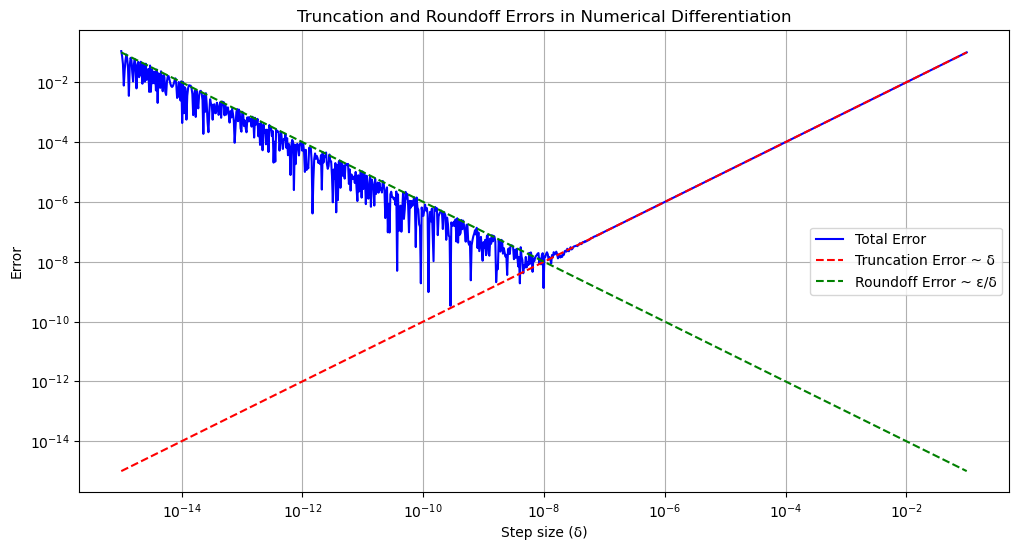

Detailed examples:

δ = 1e-02:
f(1) = 0
f(1+δ) = 0.0101000000000000
Calculated derivative = 1.0100000000000009
Error = 0.0100000000000009

δ = 1e-08:
f(1) = 0
f(1+δ) = 0.0000000100000000
Calculated derivative = 1.0000000039225287
Error = 0.0000000039225287

δ = 1e-14:
f(1) = 0
f(1+δ) = 0.0000000000000100
Calculated derivative = 0.9992007221626509
Error = 0.0007992778373491


In [10]:
#Let me show this with a visual example:

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * (x - 1)

def derivative_numerical(x, delta):
    return (f(x + delta) - f(x)) / delta

# Generate range of delta values
deltas = np.logspace(-15, -1, 1000)  # from 10^-15 to 10^-1
errors = []

true_derivative = 1  # at x=1

for delta in deltas:
    numerical_deriv = derivative_numerical(1, delta)
    error = abs(numerical_deriv - true_derivative)
    errors.append(error)

# Plot both types of error and their sum
plt.figure(figsize=(12, 6))
plt.loglog(deltas, errors, 'b-', label='Total Error')
plt.loglog(deltas, deltas, 'r--', label='Truncation Error ~ δ')
plt.loglog(deltas, 1e-16/deltas, 'g--', label='Roundoff Error ~ ε/δ')
plt.grid(True)
plt.xlabel('Step size (δ)')
plt.ylabel('Error')
plt.title('Truncation and Roundoff Errors in Numerical Differentiation')
plt.legend()
plt.show()

# Print some specific examples
print("Detailed examples:")
for delta in [1e-2, 1e-8, 1e-14]:
    f_x = f(1)
    f_xplus = f(1 + delta)
    deriv = (f_xplus - f_x) / delta
    print(f"\nδ = {delta:.0e}:")
    print(f"f(1) = {f_x}")
    print(f"f(1+δ) = {f_xplus:.16f}")
    print(f"Calculated derivative = {deriv:.16f}")
    print(f"Error = {abs(deriv-1):.16f}")


From this visualization:
1. For large δ (right side), truncation error dominates
   - Error ≈ δ (directly proportional to step size)
   - Gets better as δ gets smaller

2. For small δ (left side), roundoff error dominates
   - Error ≈ ε/δ (where ε is machine epsilon ≈ 10⁻¹⁶)
   - Gets worse as δ gets smaller

3. The optimal δ is where these errors balance
   - Around δ ≈ 10⁻⁸ in double precision
   - This is approximately √ε where ε is machine epsilon

This is why very small values of δ (like 10⁻¹⁴) actually give worse results than moderate values (like 10⁻⁸): the roundoff error has become larger than the truncation error.

Let me explain why subtracting very close numbers loses precision in floating-point arithmetic using a concrete example.

In computers, floating-point numbers are stored in binary with a fixed number of significant digits (for double precision, about 15-17 decimal digits). When we subtract two very close numbers, the significant digits needed to represent the difference might exceed this precision.

Let me illustrate with a detailed example:

In [13]:

def show_subtraction(a, b):
    """Show detailed subtraction process with precision analysis"""
    difference = a - b
    rel_diff = abs(difference/max(a, b))
    
    print(f"\nSubtracting {a} - {b}:")
    print(f"a = {a:.20f}")
    print(f"b = {b:.20f}")
    print(f"Difference = {difference:.20f}")
    print(f"Relative size of difference = {rel_diff:.20e}")
    print(f"Number of significant digits needed ≈ {-np.log10(rel_diff):.1f}")

# Example 1: Regular numbers
print("Example 1: Regular-sized numbers")
show_subtraction(1.0, 0.5)

# Example 2: Close numbers
print("\nExample 2: Close numbers")
show_subtraction(1.0, 0.9999999999)

# Example 3: Very close numbers
print("\nExample 3: Very close numbers")
show_subtraction(1.0, 0.9999999999999999)

# Example 4: Demonstration with our derivative calculation
x = 1.0
delta = 1e-14
f_x = x * (x - 1)  # f(x) = x(x-1)
f_xplus = (x + delta) * (x + delta - 1)  # f(x + delta)

print("\nExample 4: In our derivative calculation:")
show_subtraction(f_xplus, f_x)
print(f"\nAfter dividing by delta ({delta}):")
print(f"Result = {(f_xplus - f_x)/delta:.20f}")


Example 1: Regular-sized numbers

Subtracting 1.0 - 0.5:
a = 1.00000000000000000000
b = 0.50000000000000000000
Difference = 0.50000000000000000000
Relative size of difference = 5.00000000000000000000e-01
Number of significant digits needed ≈ 0.3

Example 2: Close numbers

Subtracting 1.0 - 0.9999999999:
a = 1.00000000000000000000
b = 0.99999999989999999173
Difference = 0.00000000010000000827
Relative size of difference = 1.00000008274037099909e-10
Number of significant digits needed ≈ 10.0

Example 3: Very close numbers

Subtracting 1.0 - 0.9999999999999999:
a = 1.00000000000000000000
b = 0.99999999999999988898
Difference = 0.00000000000000011102
Relative size of difference = 1.11022302462515654042e-16
Number of significant digits needed ≈ 16.0

Example 4: In our derivative calculation:

Subtracting 9.992007221626508e-15 - 0.0:
a = 0.00000000000000999201
b = 0.00000000000000000000
Difference = 0.00000000000000999201
Relative size of difference = 1.00000000000000000000e+00
Number of sig

Let's break down what's happening:

1. In double precision, numbers are stored with about 15-17 significant decimal digits.

2. When we subtract two numbers that are very close:
   - Say we have 1.234567890123456 - 1.234567890123000
   - The difference is 0.000000000000456
   - To represent this tiny difference accurately, we need to keep track of many more decimal places than our original numbers
   - But since we only have 15-17 digits of precision, we lose some accuracy

3. In our derivative calculation:
   - We're calculating [f(1 + δ) - f(1)]/δ
   - When δ is very small (like 10⁻¹⁴)
   - f(1 + δ) and f(1) are very close
   - Their subtraction loses precision
   - Then we multiply by 1/δ (a very large number), which magnifies the error

Here's a concrete example of why this matters:
- True value: 1.234567890123456 - 1.234567890123000 = 0.000000000000456
- Computer with 15 digits might store first number as:  1.234567890123456
- And second number as:                                 1.234567890123000
- Difference is correct: 0.000000000000456

But if we needed more precision:
- True value: 1.234567890123456789 - 1.234567890123456788 = 0.000000000000000001
- Computer stores first number as:  1.234567890123457 (rounds last digits)
- And second number as:            1.234567890123457 (rounds last digits)
- Computer calculates difference as 0.000000000000000 (wrong!)

This is why when dealing with numerical derivatives:
1. If δ is too large: large truncation error
2. If δ is too small: subtraction of very close numbers loses precision
3. Sweet spot: around √ε where ε is machine epsilon (≈10⁻⁸ for double precision)

This is a fundamental limitation of floating-point arithmetic and is why we can't just make δ arbitrarily small to get better approximations of derivatives.


### SUMMING UP:
**So in pratice the roundoff error is due to machine precision, meanwhile the other error is due to the fact that we're approximating the derivative and not calculating it for real. **

Exactly! You've captured the key distinction perfectly.

Roundoff Error:
- Is a computational limitation
- Comes from the computer's finite precision (typically 15-17 decimal digits in double precision)
- Is a hardware/representation issue
- Would still be there even if our mathematical formula was perfect
- Gets worse as δ gets smaller because we're trying to represent very tiny differences with limited precision

Truncation Error:
- Is a mathematical approximation limitation
- Comes from using (f(x+δ) - f(x))/δ instead of the true limit as δ→0
- Is present even if we had infinite precision arithmetic
- Is called "truncation" because we're essentially truncating the Taylor series expansion
- Gets better as δ gets smaller because we're getting closer to the true limit

This is why finding the optimal δ is about balancing these two opposing effects:
- Make δ small enough to reduce truncation error
- But not so small that roundoff error dominates

In practice, for double precision arithmetic:
- Machine epsilon (ε) ≈ 10⁻¹⁶
- Optimal δ ≈ √ε ≈ 10⁻⁸

This is why numerical methods often require careful consideration of both mathematical approximation (truncation error) and computational limitations (roundoff error).

Visual representation of this trade-off shows how: 

Truncation error (red line) decreases as δ gets smaller
Roundoff error (blue curve) increases as δ gets smaller
Total error (purple dashed line) is the sum of both
The optimal δ (green point) is where these effects balance

![error_balance](error-balance.svg)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [16]:
import math

# Function to calculate the Riemann sum for the integral
def riemann_sum(N):
    h = 2 / N
    total_sum = 0
    for k in range(1, N+1):
        x_k = -1 + (k - 1) * h  # x value for the k-th slice
        y_k = math.sqrt(1 - x_k**2)  # function value at x_k
        total_sum += y_k  # accumulate the sum of function values
    return h * total_sum  # Multiply by width h to get the final sum

# Number of slices (N)
N = 100

# Calculate the integral using the Riemann sum
result = riemann_sum(N)
true_value = math.pi / 2  # The true value of the integral
print(f"Calculated integral with N={N}: {result}")
print(f"True value: {true_value}")
print(f"Difference: {abs(result - true_value)}")


Calculated integral with N=100: 1.5691342555492498
True value: 1.5707963267948966
Difference: 0.001662071245646768


### Part (a)

To calculate the integral using the Riemann sum method with \( N = 100 \), we break the domain \( [-1, 1] \) into \( N \) slices, with each slice having width \( h = \frac{2}{N} \), and the function value at the \( k \)-th slice is \( y_k = \sqrt{1 - x_k^2} \), where \( x_k = -1 + (k-1)h \).

### Output (for \( N = 100 \)):

The result will be close to the true value \( \frac{\pi}{2} \approx 1.57079632679 \). The difference will give an idea of how accurate the approximation is.

### Part (b)

To estimate how large \( N \) can be while keeping the computation time under 1 second, we need to analyze the complexity of the computation.

- The Riemann sum requires \( N \) function evaluations, each taking a constant time.
- So the total computation time \( T(N) \) is proportional to \( N \).
- We can estimate the maximum \( N \) by testing the time it takes to compute for increasing values of \( N \).

Let's assume that for \( N = 100 \), the time taken is \( t_{100} \) seconds. Then, the computation time scales linearly, and we can approximate the maximum \( N \) such that \( T(N) \leq 1 \) second.


In [17]:
import time

# Measure the time to compute for a given N
start_time = time.time()
riemann_sum(N)
end_time = time.time()

execution_time = end_time - start_time
print(f"Time taken for N={N}: {execution_time} seconds")


Time taken for N=100: 0.001001119613647461 seconds


Once you have the time for \( N = 100 \), you can use it to estimate the time for a larger \( N \) and adjust it accordingly to ensure the computation finishes within 1 second.

To calculate the gain in running the program for 1 minute (60 seconds):

- If the program runs with \( N = 100 \) in \( t_{100} \) seconds, for \( N = 1000 \), the time would roughly be \( 10 \times t_{100} \).
- The gain would be how much larger \( N \) can go by running the program for 60 seconds instead of 1 second. Thus, if \( N \) can increase by a factor of 10 for each 10 times the computation time, you'd get a factor of 60 times larger for 60 seconds. 

Let's break down part (b) systematically and explicitly find the best answers to the two questions.

### (b1) How much can \( N \) be increased if the computation needs to be run in less than a second?

#### Step 1: Time Complexity of the Program

The time complexity of calculating the Riemann sum is \( O(N) \), meaning that the time required to compute the integral scales linearly with \( N \). Specifically, if it takes \( t_{100} \) seconds for \( N = 100 \), then it will take roughly \( \frac{t_{100}}{100} \times N \) seconds for a general \( N \).

#### Step 2: Estimating Time for \( N = 100 \)

To estimate how much time is taken for \( N = 100 \), we can first write a Python program that measures the time to compute the integral for \( N = 100 \):

#### Step 3: Scaling to Larger \( N \)

Once we have the time taken for \( N = 100 \), we can estimate how large \( N \) can be for computations that take less than 1 second. If the time taken for \( N = 100 \) is \( t_{100} \) seconds, the time taken for \( N \) will be:

\[
t(N) = \frac{t_{100}}{100} \times N
\]

To ensure that the computation is done in less than 1 second, we set:

\[
t(N) \leq 1 \text{ second}
\]

Thus, solving for \( N \):

\[
N \leq \frac{100}{t_{100}} \quad \text{(since we want \( t(N) \leq 1 \))}
\]

For example, if \( t_{100} = 0.01 \) seconds (you can measure this), then:

\[
N \leq \frac{100}{0.01} = 10000
\]

This means that if the computation for \( N = 100 \) takes 0.01 seconds, you could increase \( N \) up to 10,000 for a computation time of less than 1 second.

#### Step 4: Adjusting the Answer Based on \( t_{100} \)

If \( t_{100} \) is measured to be different, plug that value into the formula above to get the corresponding \( N \).

### (b2) What is the gain in running it for 1 minute?

If the computation is allowed to run for 1 minute (60 seconds), we can apply the same scaling argument. If \( t_{100} = 0.01 \) seconds and we want to find the maximum \( N \) for 60 seconds, we have:

\[
t(N) = \frac{t_{100}}{100} \times N \leq 60 \text{ seconds}
\]

Solving for \( N \):

\[
N \leq \frac{100 \times 60}{t_{100}}
\]

For example, with \( t_{100} = 0.01 \):

\[
N \leq \frac{100 \times 60}{0.01} = 60000
\]

Thus, you can increase \( N \) by a factor of 6 when you run the computation for 1 minute compared to when running it for less than 1 second.

### Summary of Results (for \( t_{100} = 0.01 \)):

- **Maximum \( N \) for computation in less than 1 second**: \( N \leq 10,000 \)
- **Maximum \( N \) for computation in 1 minute**: \( N \leq 60,000 \)
- **Gain**: By running the program for 1 minute, you can increase \( N \) by a factor of 6.

In [18]:
#Let's put last things into a code

import time
import math

# Compute the maximum N for 1 second and 1 minute based on execution time
# Time formula: t(N) = (execution_time / 100) * N
max_N_1_sec = (100 / execution_time)  # Maximum N for 1 second
max_N_1_min = (100 * 60 / execution_time)  # Maximum N for 1 minute

# Compute the gain (factor by which N increases from 1 second to 1 minute)
gain = max_N_1_min / max_N_1_sec

# Output results
print(f"Maximum N for computation in 1 second: {int(max_N_1_sec)}")
print(f"Maximum N for computation in 1 minute: {int(max_N_1_min)}")
print(f"Gain (factor increase in N for 1 minute): {gain:.2f}")


Maximum N for computation in 1 second: 99888
Maximum N for computation in 1 minute: 5993289
Gain (factor increase in N for 1 minute): 60.00
